In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import hstrat
import typing
from downstream import dstream
from track_ca import track_ca_history, plot_phylo_at, plot_ancestry_at
import matplotlib.pyplot as plt
import pandas as pd
import polars as pl

import imageio
from pathlib import Path

In [3]:
teeplot_subdir = os.environ.get("NOTEBOOK_NAME", "track_ca")

## Try on test data

In [4]:
data = np.array([
    [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],
    [[0, 0, 0, 0, 0, 1, 0, 1, 0, 0]],
    [[0, 0, 0, 0, 1, 0, 0, 1, 0, 0]],
    [[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]],
    [[0, 0, 1, 0, 1, 0, 0, 1, 0, 0]],
    [[0, 0, 1, 0, 1, 0, 0, 1, 0, 0]],
    [[0, 0, 1, 0, 1, 0, 1, 0, 1, 0]],
    [[0, 0, 1, 0, 1, 0, 1, 0, 1, 0]],
    [[0, 0, 1, 0, 1, 0, 1, 0, 1, 0]],
    [[0, 1, 1, 0, 1, 0, 1, 0, 1, 0]],
], dtype=np.bool_)
phylo_df, newick_str = track_ca_history(data, dstream.steady_algo, 8, 1)

d
(1, 10)
(1, 10, 8)
a
c
e


100%|██████████| 5/5 [00:00<00:00, 20420.18it/s]


In [5]:
phylo_df

,dstream_data_id,id,ancestor_id,hstrat_rank,hstrat_differentia_bitwidth,dstream_S,data_hex,extant,row,col,state,rank,origin_time
0,9223372036854775807,0,0,0,1,8,None,None,NaN,NaN,NaN,0,18446744073709551608
1,9223372036854775807,1,0,0,1,8,None,None,NaN,NaN,NaN,0,18446744073709551608
2,9223372036854775807,2,1,3,1,8,None,None,NaN,NaN,NaN,3,18446744073709551611
3,0,3,2,8,1,8,000000091f,True,0.0,1.0,1.0,8,0
4,9223372036854775807,4,2,6,1,8,None,None,NaN,NaN,NaN,6,18446744073709551614
5,1,5,4,8,1,8,000000091d,True,0.0,2.0,1.0,8,0
6,2,6,4,8,1,8,000000090d,True,0.0,4.0,1.0,8,0
7,9223372036854775807,7,1,5,1,8,None,None,NaN,NaN,NaN,5,18446744073709551613
8,3,8,7,8,1,8,000000096c,True,0.0,6.0,1.0,8,0
9,4,9,7,8,1,8,000000097d,True,0.0,8.0,1.0,8,0


In [6]:
newick_str

'(((:3,:3):5,((:2,:2):3,:5):3):0):0;'

In [7]:
data = np.ones((1000, 100, 100), dtype=np.bool_)
phylo_df, newick_str = track_ca_history(data, dstream.steady_algo, 64, 1)

d
(100, 100)
(100, 100, 64)
a
c
e


100%|██████████| 10000/10000 [00:00<00:00, 447363.80it/s]


In [8]:
phylo_df

,dstream_data_id,id,ancestor_id,hstrat_rank,hstrat_differentia_bitwidth,dstream_S,data_hex,extant,row,col,state,rank,origin_time
0,9223372036854775807,0,0,0,1,64,None,None,NaN,NaN,NaN,0,18446744073709551552
1,9223372036854775807,1,0,895,1,64,None,None,NaN,NaN,NaN,895,831
2,9223372036854775807,2,1,911,1,64,None,None,NaN,NaN,NaN,911,847
3,9223372036854775807,3,2,927,1,64,None,None,NaN,NaN,NaN,927,863
4,9223372036854775807,4,3,943,1,64,None,None,NaN,NaN,NaN,943,879
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10123,9995,10123,6315,998,1,64,000003e78b4be32baef55b72,True,99.0,95.0,1.0,998,934
10124,9996,10124,4389,998,1,64,000003e78b4be32faef15b70,True,99.0,96.0,1.0,998,934
10125,9997,10125,113,998,1,64,000003e78b4be32faef45b7c,True,99.0,97.0,1.0,998,934
10126,9998,10126,97,998,1,64,000003e78b4be32baef15b7e,True,99.0,98.0,1.0,998,934


In [9]:
with open("output_test.newick", "w") as f:
    f.write(newick_str)

## Try on real data

#### From MaceNCA

In [10]:
data = np.load("hist.npy").astype(np.bool_)
phylo_df, newick_str = track_ca_history(data, dstream.steady_algo, 64, 1)

d
(450, 640)
(450, 640, 64)
a
c
e


100%|██████████| 5279/5279 [00:00<00:00, 405853.27it/s]


In [11]:
with open("output_mace.newick", 'w') as f:
    f.write(newick_str)

### From the outlier rule

In [13]:
data = np.load("outlier_history.npy")
fossil_range = {400}
phylo_df, newick_str = track_ca_history(data, dstream.steady_algo, 64, R=1, fossil_range=fossil_range)
with open("output_outlier.newick", 'w') as f:
    f.write(newick_str)
phylo_df["gol_state"] = phylo_df["state"]
phylo_df["taxon_label"] = phylo_df["id"]
phylo_df["origin_time"] = phylo_df["origin_time"] + 64
phylo_df = hstrat._auxiliary_lib.alifestd_mark_root_id(phylo_df)
phylo_df = hstrat._auxiliary_lib.alifestd_collapse_unifurcations(phylo_df)
phylo_df

100%|██████████| 872/872 [00:00<00:00, 430033.28it/s]


,dstream_data_id,id,ancestor_id,hstrat_rank,hstrat_differentia_bitwidth,dstream_S,data_hex,extant,row,col,state,rank,origin_time,gol_state,taxon_label,root_id
0,9223372036854775807,0,0,0,1,64,None,None,NaN,NaN,NaN,0,0,NaN,0,0
1,9223372036854775807,1,0,79,1,64,None,None,NaN,NaN,NaN,79,79,NaN,1,0
2,9223372036854775807,2,1,203,1,64,None,None,NaN,NaN,NaN,203,203,NaN,2,0
3,9223372036854775807,3,2,359,1,64,None,None,NaN,NaN,NaN,359,359,NaN,3,0
4,9223372036854775807,4,3,367,1,64,None,None,NaN,NaN,NaN,367,367,NaN,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,868,961,861,857,1,64,0000035aa80d9d1394066e23,True,190.0,101.0,1.0,857,857,1.0,961,0
962,9223372036854775807,962,808,847,1,64,None,None,NaN,NaN,NaN,847,847,NaN,962,0
963,869,963,962,857,1,64,0000035aa82d9c3380467963,True,190.0,142.0,1.0,857,857,1.0,963,0
964,870,964,893,857,1,64,0000035aa80d9d3394066e63,True,191.0,77.0,1.0,857,857,1.0,964,0


#### Generate a plot showing the phylogeny at a specific generation

teeplots/track_ca/rank=858.0+viz=subplots+ext=.pdf
teeplots/track_ca/rank=858.0+viz=subplots+ext=.png


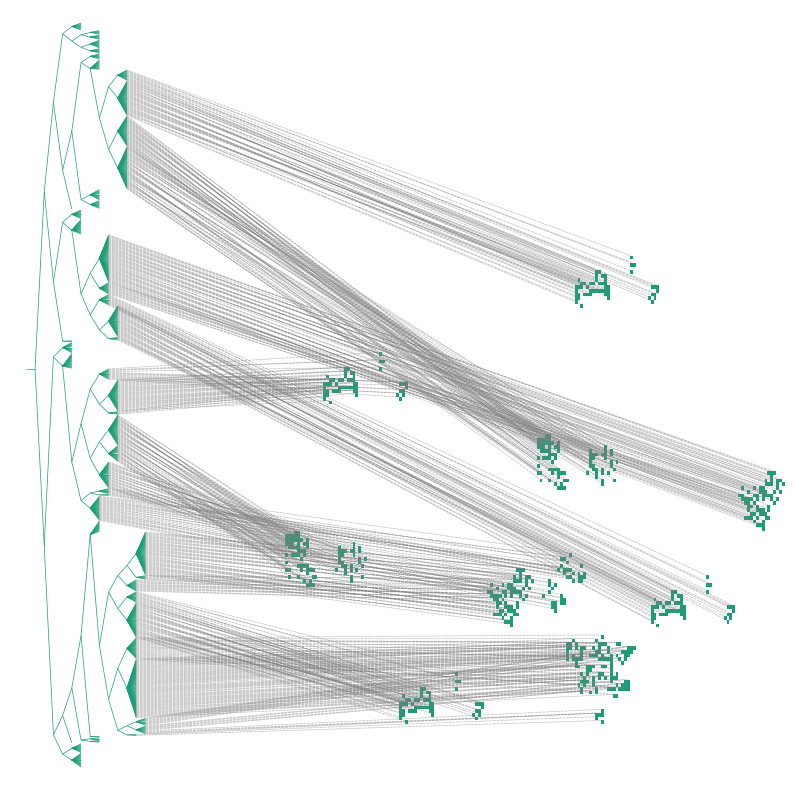

In [14]:
plot_phylo_at(phylo_df, teeplot_subdir, fossil_rank=None)

In [ ]:
for i in fossil_range:
    plot_phylo_at(phylo_df, teeplot_subdir, show=False, fossil_rank=i)

In [ ]:
images = []
for filename in sorted((Path()/"teeplots"/teeplot_subdir).glob("rank=*.png"), key=lambda p: float(p.name.removeprefix("rank=").split('+')[0])):
    images.append(imageio.imread(filename)[:, :, :3])
imageio.mimsave('ca.gif', images, fps=1, loop=0)

#### Generate a plot visualizing the relationships between two generations

teeplots/track_ca/child-rank=858.0+parent-rank=400+viz=subplots+ext=.pdf
teeplots/track_ca/child-rank=858.0+parent-rank=400+viz=subplots+ext=.png


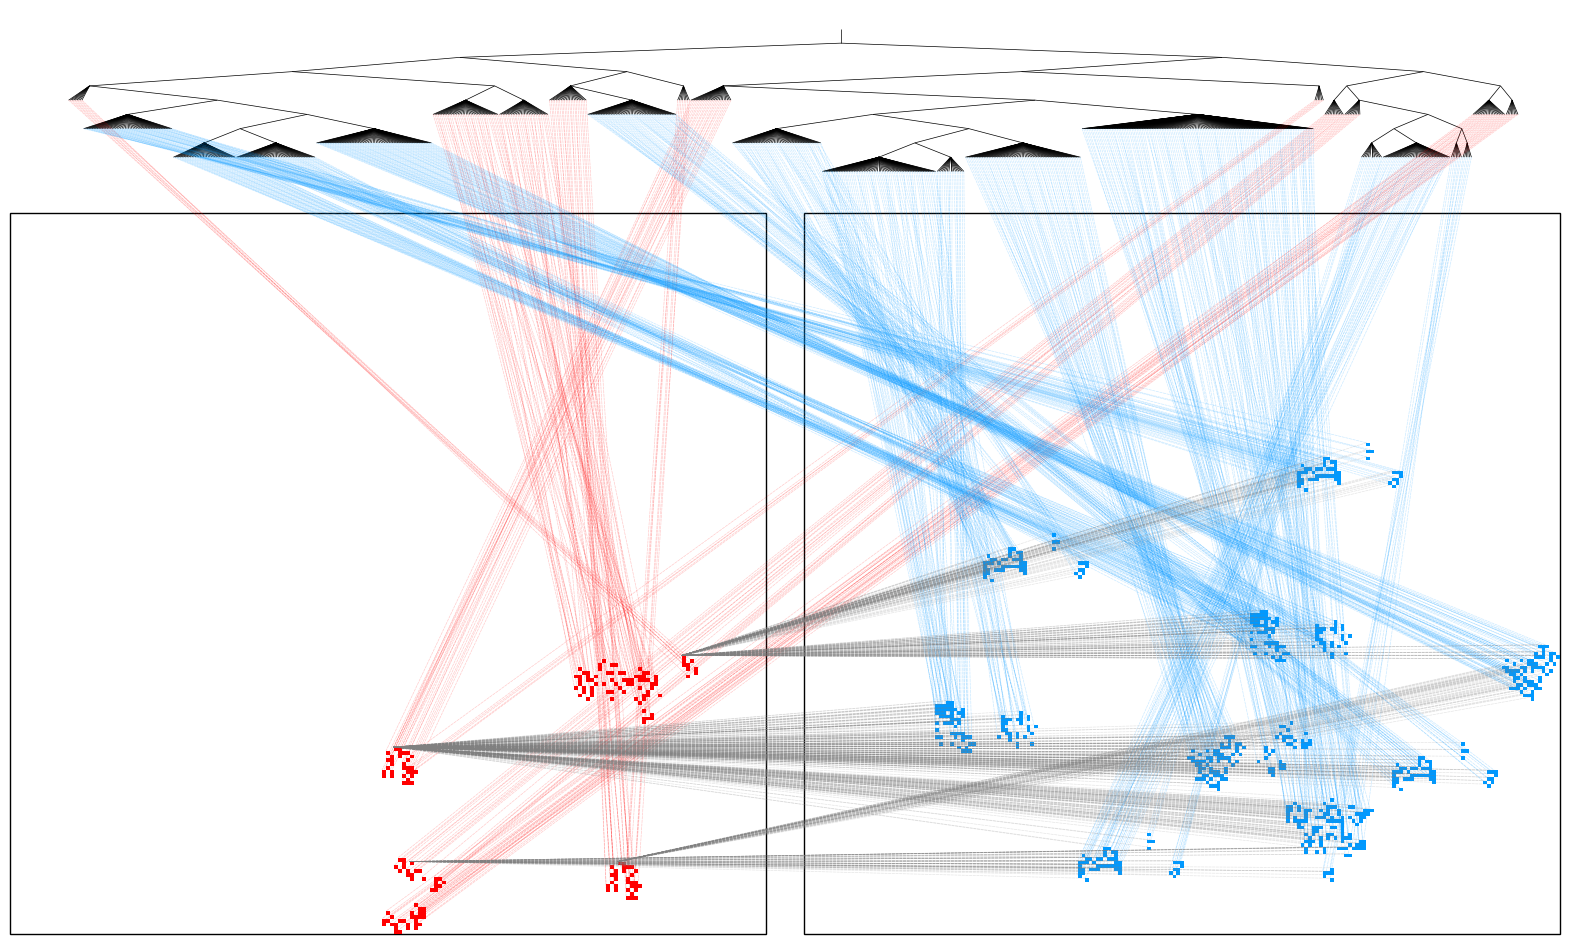

In [ ]:
plot_ancestry_at(phylo_df, 400, show=True, teeplot_subdir=teeplot_subdir)